  <p>Nama: Rahmat Pratami</p>
  <p>Email: exzaardyansyah894@gmail.com</p>

In [1]:
!pip install split_folders tqdm

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d madisona/translated-animals10

 98% 573M/586M [00:05<00:00, 138MB/s]
100% 586M/586M [00:05<00:00, 119MB/s]


In [4]:
# Create new Directory
!mkdir datapict
!unzip -qq translated-animals10.zip -d datapict
!ls datapict

animals10


In [5]:
# Import Directory

import tensorflow as tf
import shutil
import splitfolders
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Input

print(tf.__version__)

2.15.0


In [6]:
# Delete Directory

shutil.rmtree('datapict/animals10/raw-img/butterfly')
shutil.rmtree('datapict/animals10/raw-img/chicken')
shutil.rmtree('datapict/animals10/raw-img/horse')
shutil.rmtree('datapict/animals10/raw-img/elephant')
shutil.rmtree('datapict/animals10/raw-img/spider')
shutil.rmtree('datapict/animals10/raw-img/squirrel')

In [7]:
splitfolders.ratio('datapict/animals10/raw-img/', output = 'datapict/animals10/raw-img/animal', ratio = (0.8, 0.2))

Copying files: 10217 files [00:04, 2421.68 files/s]


In [8]:
# Join Directory
base_dir = 'datapict/animals10/raw-img/animal'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_sheep_dir = os.path.join(train_dir, 'sheep')
train_cow_dir = os.path.join(train_dir, 'cow')
train_dog_dir = os.path.join(train_dir, 'dog')
train_cat_dir = os.path.join(train_dir, 'cat')

validation_sheep_dir = os.path.join(validation_dir, 'sheep')
validation_dog_dir = os.path.join(validation_dir, 'cow')
validation_cow_dir = os.path.join(validation_dir, 'dog')
validation_cat_dir = os.path.join(validation_dir, 'cat')

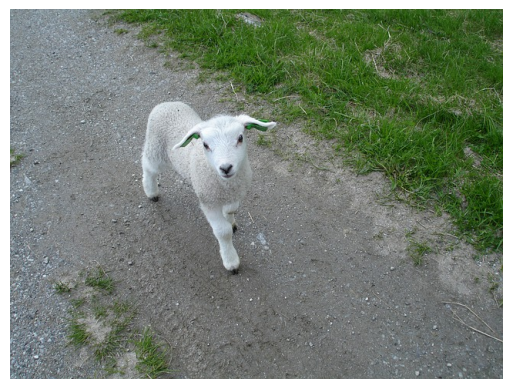

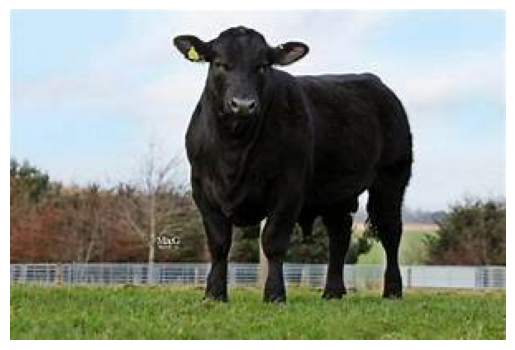

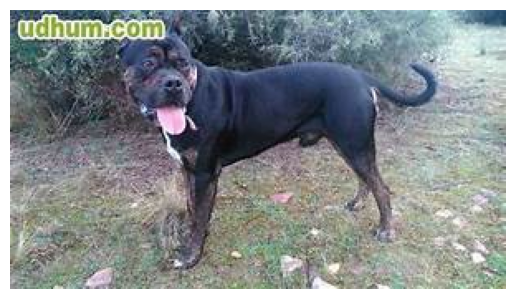

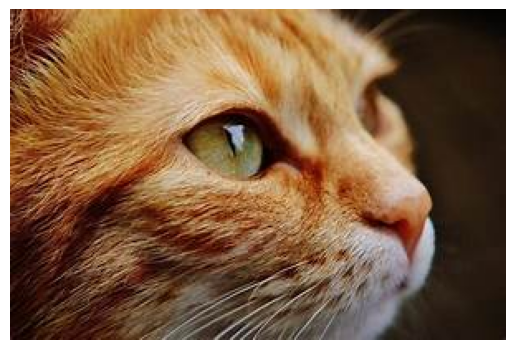

In [9]:
sheep_files = os.listdir(train_sheep_dir)
cow_files = os.listdir(train_cow_dir)
dog_files = os.listdir(train_dog_dir)
cat_files = os.listdir(train_cat_dir)

pic_index = random.randrange(0, 1000)

image_sheep = [os.path.join(train_sheep_dir, fname) for fname in sheep_files[pic_index-1:pic_index]]
image_cow = [os.path.join(train_cow_dir, fname) for fname in cow_files[pic_index-1:pic_index]]
image_dog = [os.path.join(train_dog_dir, fname) for fname in dog_files[pic_index-1:pic_index]]
image_cat = [os.path.join(train_cat_dir, fname) for fname in cat_files[pic_index-1:pic_index]]

for i, img_path in enumerate(image_sheep + image_cow + image_dog + image_cat):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 20,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip=True,
                                  shear_range = 0.2,
                                  fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),  # Change the resolution pixel to 150x150
    batch_size = 64,
    shuffle=False,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150), # Change the resolution pixel to 150x150
    batch_size = 64,
    shuffle=False,
    class_mode = 'categorical')


Found 8172 images belonging to 4 classes.
Found 2045 images belonging to 4 classes.


In [11]:
# Load the VGG16 model but exclude the top layers
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Make the base model untrainable
for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.models.Sequential([
    base_model,

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Use padding='same'
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Use padding='same'
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Use padding='same'

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()


234545216/234545216 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          589856    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                       

Epoch 1/150
128/128 - 105s - loss: 1.3562 - accuracy: 0.3440 - val_loss: 1.2466 - val_accuracy: 0.4763 - 105s/epoch - 823ms/step
Epoch 2/150
128/128 - 79s - loss: 1.2521 - accuracy: 0.4473 - val_loss: 1.1590 - val_accuracy: 0.4763 - 79s/epoch - 620ms/step
Epoch 3/150
128/128 - 81s - loss: 1.1680 - accuracy: 0.4792 - val_loss: 1.0938 - val_accuracy: 0.4797 - 81s/epoch - 636ms/step
Epoch 4/150
128/128 - 80s - loss: 1.0977 - accuracy: 0.5032 - val_loss: 1.0058 - val_accuracy: 0.5115 - 80s/epoch - 623ms/step
Epoch 5/150
128/128 - 81s - loss: 1.0247 - accuracy: 0.5491 - val_loss: 0.9470 - val_accuracy: 0.6665 - 81s/epoch - 629ms/step
Epoch 6/150
128/128 - 80s - loss: 0.9703 - accuracy: 0.5988 - val_loss: 0.8813 - val_accuracy: 0.7384 - 80s/epoch - 623ms/step
Epoch 7/150
128/128 - 80s - loss: 0.9009 - accuracy: 0.6536 - val_loss: 0.7884 - val_accuracy: 0.7648 - 80s/epoch - 628ms/step
Epoch 8/150
128/128 - 80s - loss: 0.8331 - accuracy: 0.6937 - val_loss: 0.7155 - val_accuracy: 0.7819 - 80s/e

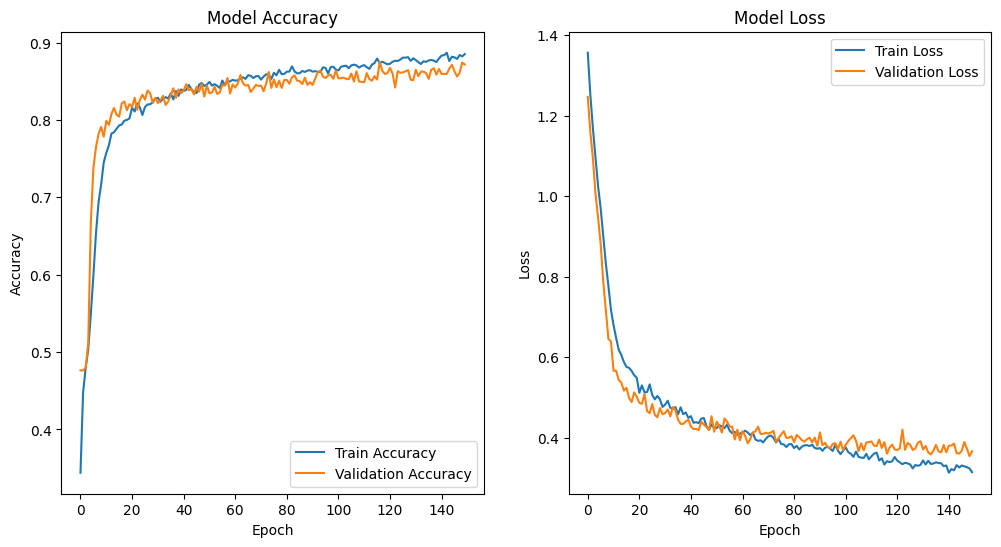

In [12]:
# Callback function to avoid overfit
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("\nAkurasi diatas 92%, training selesai!")
      self.model.stop_training = True

callbacks = myCallback()

# Set learning rate
custom_optimizer = Adam(learning_rate=0.00001)

# Compile model with 'Adam' optimizer and categorical cross-entropy loss function

model.compile(optimizer=custom_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs = 150,
                    steps_per_epoch=len(train_generator),
                    validation_data = validation_generator,
                    validation_steps=len(validation_generator),
                    verbose = 2,
                    callbacks = [callbacks])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('animal.tflite', 'wb') as f:
  f.write(tflite_model)